# **K-Nearest Neighbors Classifier**

K-Nearest Neighbour (KNN) is a simple, non-parametric, and lazy learning algorithm usewd for classification and regression tasks. It works by finding the **k** most similar instances (neighbors) to a given data point and making predictions based on them.

#### How KNN works

1. Choose K (The no..of nearest neighbours)
2. Calculate the distance
   * Common distance metrics:
     * Euclidean distance (most common)
     * Manhattan distance
     * Cosine similarity  
3. Find the K nearest neighbour to the new data point.
4. Make Predictions
   * Classification: Assign the most comon class among the K neighbors.
   * Regression: Take the average (or weighted average) of the neighbours values.

#### Advantages:
1. Simple and easy to implement
2. No need for training (lazy learning)
3. Works well with small datasets

#### Disadvantages:
1. Slow for large datasets 9since it stores all data points)
2. Sensitive to irrelevant features and outliers
3. Requires chooding the right K

### Objectives of this project
1. Use K-Nearest neighbour to classify data
2. Apply KNN classifier on a real world data set

In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### About the dataset

Imagine a telecommunication provider has segmented its customer base by service usage patterns, categorizing the customers into 4 groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective ustomers. It is a classification problem. That is given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target feild called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:
1. Basic service
2. E - Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases using K-Nearest Neighbors.

In [2]:
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

Let's first look at the class-wise distribution of the data set.

In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


From this we can say that we have records of 281 customers who opt for Plus Services, 266 for Basic services, 236 for total services, and 217 for e-services. It can then be seen that the data set is mostly balanced between the different classes and requires no special means of accounting for class bias.

We can also visualize the correlation map of the data set to determine how the different features are related to each other.

In [5]:
correlation_values = df.corr()['custcat'].drop('custcat')
correlation_values

region    -0.023771
tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
retire     0.008908
gender    -0.004966
reside     0.082022
Name: custcat, dtype: float64

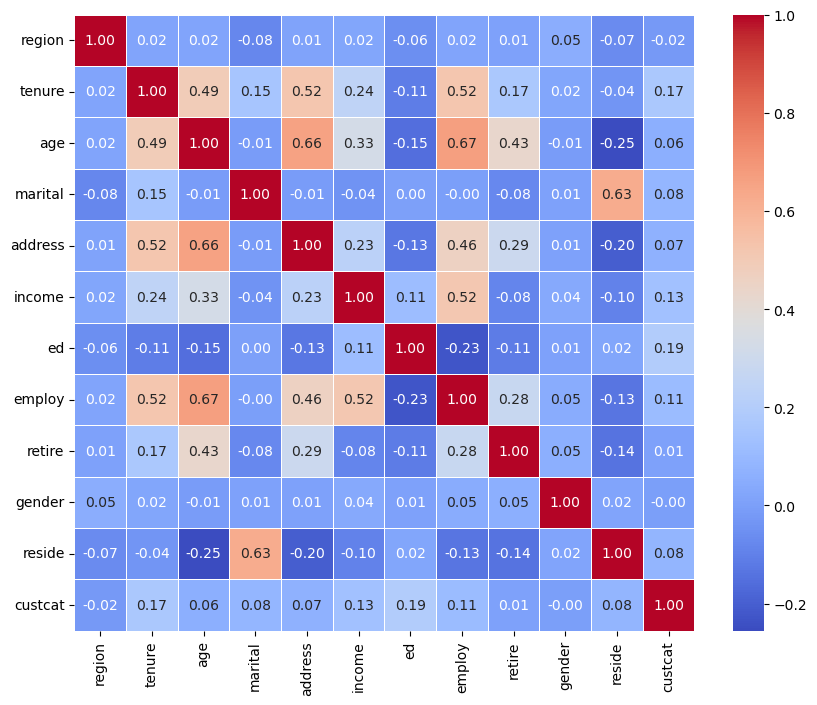

In [6]:
correlation_values1 = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_values1, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.show()

As is visible from the correlation map, some features have better correlation among them than others, basically indicating the depth of relationship between the two features. What is of intrest to us is the correlation of the target feature, i.e., `custcat` with all the other features. This will help us identify which features should be focused on for modeling and which ones can be ignored.

The following line of code snippet will gives us a list of features sorted in the descending order of their absolute correlation values with repect to the target feild.

In [7]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending = False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

This shows that the features `retire` and `gender` have the least effect on `custact` while `ed` and `tenure` have the most effect.

**Separate the input and target features**

In [8]:
X = df.drop('custcat', axis=1)
y = df['custcat']

### Normalize Data

Data normalization is important for the KNN  model.

KNN makes the predictions based on the distance between data points (samples), i.e., for a given test point the algorithm finds the k-nearest neighnours by measuring the distance between the test point and other data points in the dataset. By normalizing/standardizing the data, we ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range).

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.

In [9]:
X_norm = StandardScaler().fit_transform(X)
X_norm

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

#### Train_Test_Split data

Now, we should separate the training and testing data. We can retain 20% of the data for testing purposes and use the rest for training. Assigning a random state ensures reproducibility of the results across multiple executions.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 42)

### KNN Classification

**Training** - Initially, we may start by using a small value as the value of K, say K = 4.

In [11]:
k = 3
#train model and predict
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_model = knn_classifier.fit(X_train, y_train)

**Predicting** - Once the model is trained, we can now use this moel to generate predictions for the test set.

In [12]:
yhat = knn_model.predict(X_test)

#### Accuracy Evaluation

In multilabel calssification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [13]:
print('Test set Accuracy: ', accuracy_score(y_test, yhat))

Test set Accuracy:  0.365


Let's build the model again with k =6

In [14]:
k= 6
knn_classifier1 = KNeighborsClassifier(n_neighbors = k)

In [15]:
knn_model1 = knn_classifier1.fit(X_train, y_train)

In [16]:
yhat1 = knn_model1.predict(X_test)

In [18]:
print('Test Set Accuracy: ', accuracy_score(y_test, yhat1))

Test Set Accuracy:  0.33


#### Choosing the correct value of 'K'

K n KNN, is the no of nearest neighbours to examine. However, the choice of value 'k' clearly affects the model. Therefore the appropriate choice of the value of the variable 'k' becomes an import task. The general way of doing this is train the modelon a set of different values of 'k and noting the performance of the trained model on the testing set. The model with the best value of `accuracy_score` is the one with the ideal value of the parameter 'k'.

Let's check the performance of model for 10 values of k ranging from 0 to 9. We can evaluate the accuracy alaong with the standard deviation of the accuracy as well to get a holistic picture of the model performance.

In [20]:
k = 10
acc = np.zeros((k))
std_acc = np.zeros((k))
for n in range(1, k+1):
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#### Plot the model accuracy for a different number of neighbors.

Now, we can plot the model accuracy and the standard deviation to identify the model with the most suited value of K.

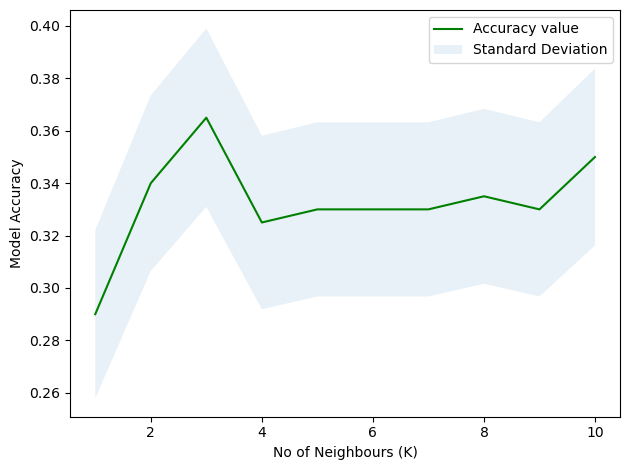

In [21]:
plt.plot(range(1, k+1), acc, 'g')
plt.fill_between(range(1, k+1), acc-1*std_acc, acc+1*std_acc, alpha = 0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('No of Neighbours (K)')
plt.tight_layout()
plt.show()

In [22]:
print('The best accuracy was with', acc.max(), 'with k =', acc.argmax()+1)

The best accuracy was with 0.365 with k = 3


However, since the graph is still rising, there can be a chance that the moel will give a better performance with an even higher value of K.

Let's run the training model for 30 values of k and then again for 100 values of k. Identifing the value of k that best suits this data and the accuracy on the test set for this model.

In [24]:
k = 30
acc = np.zeros((k))
std_acc = np.zeros((k))
for n in range(1, k+1):
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

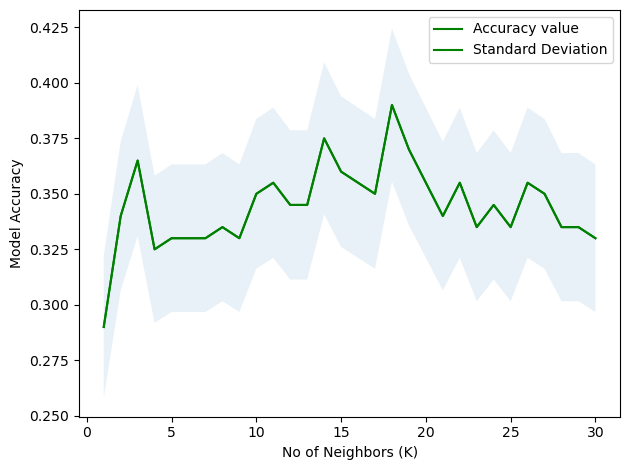

In [27]:
plt.plot(range(1, k+1), acc, 'g')
plt.fill_between(range(1, k+1), acc - 1*std_acc, acc+1*std_acc, alpha = 0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('No of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
k = 100
acc = np.zeros((k))
std_acc = np.zeros((k))
for n in range(1, k+1):
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

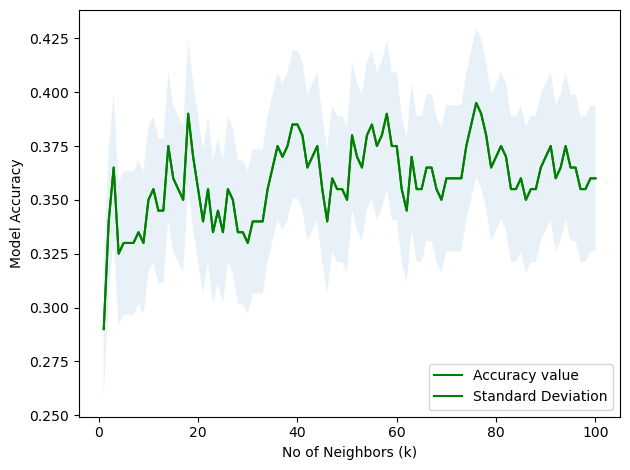

In [31]:
plt.plot(range(1, k+1), acc, 'g')
plt.fill_between(range(1, k+1), acc-1*std_acc, acc+1*std_acc, alpha = 0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('No of Neighbors (k)')
plt.tight_layout()
plt.show()

In [32]:
print('The best accuracy was with', acc.max(), 'with k =', acc.argmax() + 1)

The best accuracy was with 0.395 with k = 76


Why the model performance on training data is deteriorating with increase in the value of K?

When K is small(i.e., K = 1), the model is highly sensitive to the individual points in the dataset. The prediction for each point is based onm its closest neighbor, which can lead to highly specific and flexible boundaries. This leadis to overfitting on the training data, meaning the model will performe very well on the training set, potentially achieving 100% accuracy. However, it may generalize poorly to unseen data. When K is large, the model starts to take into account more neighbours when making predictions. This has two main consequences:

1. Smoothing of the decision boundary: The decision boundary becomes smoother, which means the model is less sensitive to the noise or fluctuations in the training data.
2. Less Specific Predictions; With a larger K, the model considers more neighbors and therefore makes more generalized predictions, which can lead to fewer instances being classified perfectly.

As a result, the model starts to become less flexible, and its ability to memorize the training data (which can lead to perfrct accuracy with small k) is reduced.

We an see that even with the optimum values, the KNN model is not performing that well on the given data, what would be the possible reason for this?

The weak performance on the model can be due to multiple reasons:
1. The KNN model relies entirely on the raw feature space at inference time. If the feature do not provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation.
2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN.
3. The algorithm treats all features equally when computing distances. Hence, weakly correlated feature can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.